In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
X_train = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_train_x.csv',delimiter=',')/255.0
Y_train = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_train_y.csv',delimiter=',').reshape(1,X_train.shape[1])

X_test = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_test_x.csv',delimiter=',')/255.0
Y_test = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_test_y.csv',delimiter=',').reshape(1,X_test.shape[1])


In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape #shape: (number of features, number of examples)

((12288, 209), (1, 209), (12288, 50), (1, 50))

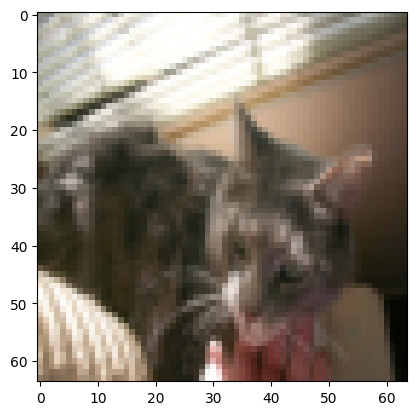

In [4]:
index = random.randrange(0, X_train.shape[1])

# Display the image at the selected index
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(64,64, 3))
plt.show()

### Activation Functions

In [5]:
def tanh(x):
    return np.tanh(x)

def sigmoid(z): #only in the binary classification problem in the output layer
    A= 1/(1+np.exp(-z))
    return A

def softmax(z): #only in the multi-class classification problem
    np.exp(z)/np.sum(np.exp(z),axis=0)

def relu(z):
    A= np.maximum(0,z)
    return A

### Derivatives of Activation Functions 

In [6]:
def tanh_prime(x):
    return 1-np.power(tanh(x),2)

def relu_prime(x):
    return np.array(x>0).astype(float)


### Intializing Parameters

In [7]:

def initialize_parameters(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)-1 # number of layers in the network (because the last layer does not have weights and biases associated with it)
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters



In [8]:
layer_dims = [X_train.shape[0], 100, 200, Y_train.shape[0]]
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

Shape of W1: (100, 12288)
Shape of B1: (100, 1) 

Shape of W2: (200, 100)
Shape of B2: (200, 1) 

Shape of W3: (1, 200)
Shape of B3: (1, 1) 



### Forward Propagation

In [9]:
def forward_propagation(X, parameters,activation='relu'):
    L = len(parameters)//2
    caches = {}
    A = X
    for l in range(1, L):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        if activation=='relu':
            A = relu(Z)
        elif activation=='tanh':
            A = tanh(Z)

        caches['A' + str(l)] = A_prev
        caches['W' + str(l)] = W
        caches['b' + str(l)] = b
        caches['Z' + str(l)] = Z
    
    # Handle the final layer separately
    WL = parameters['W' + str(L)]
    bL = parameters['b' + str(L)]
    ZL = np.dot(WL, A) + bL
    
    if ZL.shape[0] == 1:
        AL = sigmoid(ZL)
    else:
        AL = softmax(ZL)
    
    caches['A' + str(L)] = A
    caches['W' + str(L)] = WL
    caches['b' + str(L)] = bL
    caches['Z' + str(L)] = ZL
    
    return AL, caches

### Cost Function 
- Since this is a single class problem not a multi-class the cost function will be 
    
$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



In [10]:
def cost_function(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))/m
    cost = np.squeeze(cost)
    return cost

### Back Propaggation

In [1]:
def back_propagation(AL, Y,parameters,caches, activation):
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]
    
    # Compute the gradient of the cost with respect to AL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
     
    A_prev = caches['A' + str(L-1)]
    W = caches['W' + str(L)]
    b = caches['b' + str(L)]
    Z = caches['Z' + str(L)]
     
    dZ = AL - Y
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
    
    grads['dW' + str(L)] = dW
    grads['db' + str(L)] = db
    
    # Loop through the rest of the layers
    for l in reversed(range(1, L)):
        A = caches['A' + str(l)]
        W = caches['W' + str(l)]
        b = caches['b' + str(l)]
        Z = caches['Z' + str(l)]
        
        if activation=='relu':
            dZ = dA_prev * relu_prime(Z)
        elif activation=='tanh':
            dZ = dA_prev * tanh_prime(Z)
        
        dW = np.dot(dZ, A.T)/m
        db = np.sum(dZ, axis=1, keepdims=True)/m
        if l != 1:
            dA_prev = np.dot(W.T, dZ)
        
        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db
    
    return grads